## Significance of the problem:

What attributes of California houses in 1990 correlated with higher house values? It is important to understand if attributes like ocean proximity, median household income of the area, and population of the area help increase house values. This information could help property developers in choosing a new location to start a construction. For example, if there is a strong correlation with houses being near the ocean and their property value then developers should focus on coastal constructions.

## Expected outcomes:

We expect to see strong positive correlations between median household value and all of the variables in the dataset. The ones that we expect to have the strongest positive correlations are ocean proximity, median household income, and population. These variables are more important to house value than things like total bedrooms, total households, and housing age because they take into account the location and the context of the location. The context being population density and overall wealth of the area. These we believe are major drivers of housing value.

## Method of analysis:

We will be using multi-linear regression with median household value as the dependent variable. The independent variables we will be using are ocean proximity, population, median household income, total bedrooms, number of households, housing median age, and total rooms.

## Data description:

Source of dataset: https://github.com/ageron/handson-ml/tree/master/datasets/housing

Explain what each record represents: Each record represents housing data in California in 1990 as one census block group. “A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).” - Aurélien Geron (from github website)

Number of records: 20,640

longitude: The longitude of the geographical center of one census block group.

latitude: The latitude of the geographical center of one census block group.

housing_median_age: The median age of the group of houses in a single census block group.

total_rooms: The total number of rooms in the group of houses in one census block group.

total_bedrooms: The total number of bedrooms in the group of houses in one census block group.

population: The total population in one census block group.

households: The total number of households in one census block group.

median_income: The median household income in 10s of thousands of U.S. dollars in one census block group.

median_household_value: The median household value in U.S. dollars in one census block group.

ocean_proximity: This shows where the census block group is relative to the west coast. The categories are near bay, <1H ocean, inland, near ocean, and island.


In [ ]:
pip install numpy==1.24.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 85.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is 

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget https://downloads.apache.org/spark/spark-3.5.5/spark-3.5.5-bin-hadoop3.tgz

--2025-05-16 02:39:39--  https://downloads.apache.org/spark/spark-3.5.5/spark-3.5.5-bin-hadoop3.tgz
Resolving downloads.apache.org (downloads.apache.org)... 135.181.214.104, 88.99.208.237, 2a01:4f9:3a:2c57::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|135.181.214.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 400724056 (382M) [application/x-gzip]
Saving to: ‘spark-3.5.5-bin-hadoop3.tgz’

spark-3.5.5-bin-had 100%[===================>] 382.16M  18.9MB/s    in 22s     

2025-05-16 02:40:02 (17.5 MB/s) - ‘spark-3.5.5-bin-hadoop3.tgz’ saved [400724056/400724056]



In [ ]:
!tar xf spark-3.5.5-bin-hadoop3.tgz

In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.5-bin-hadoop3"

In [ ]:
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
spark

In [ ]:
import pyspark.pandas as ps

/content/spark-3.5.5-bin-hadoop3/python/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [ ]:
df = ps.read_csv('housing.csv')


/content/spark-3.5.5-bin-hadoop3/python/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `read_csv`, the default index is attached which can cause additional overhead.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


check for duplicate records

In [ ]:
print(df.shape[0], df.to_spark().distinct().count())

/content/spark-3.5.5-bin-hadoop3/python/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


20640 20640


Both numbers are the same so we do not have any duplicate records

number of rows with missing values

In [ ]:
x = df.isna().sum(axis=1)
x[x >= 1].shape[0]

207

count the number of missing values the columns of each row

In [ ]:
x = df.isna().sum(axis=1)
x.sort_values(ascending=False)

290      1
341      1
538      1
563      1
696      1
738      1
1097     1
1350     1
1456     1
1493     1
1606     1
2028     1
2115     1
2301     1
2323     1
2334     1
2351     1
2412     1
2420     1
2578     1
2608     1
2647     1
2826     1
3024     1
3328     1
3354     1
3376     1
3482     1
3485     1
3529     1
3721     1
3778     1
3912     1
3921     1
3958     1
4043     1
4046     1
4186     1
4279     1
4309     1
4391     1
4447     1
4496     1
4591     1
4600     1
4629     1
4667     1
4691     1
4738     1
4743     1
4744     1
4767     1
4852     1
5059     1
5216     1
5222     1
5236     1
5654     1
5665     1
5678     1
5723     1
5751     1
5990     1
6052     1
6068     1
6220     1
6241     1
6253     1
6298     1
6421     1
6541     1
6590     1
6814     1
6835     1
6962     1
7097     1
7113     1
7168     1
7191     1
7228     1
7316     1
7330     1
7547     1
7654     1
7668     1
7763     1
7806     1
8337     1
8383     1
8530     1
8915     1

there is only one column missing a value in each row

count percentage of missing values in each column

In [ ]:
df.isna().sum(axis=0)/df.shape[0]

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

there is only one column which contains the missing values

In [ ]:
# Calculate the average ratio of total_rooms to total_bedrooms
average_ratio = df['total_rooms'].mean() / df['total_bedrooms'].mean()


In [ ]:
average_ratio

4.90036695439147

In [ ]:
# Fill NaN values in 'total_bedrooms' with the mean of 'total_rooms' divided by 4.9
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_rooms'].mean() / 4.9)


In [ ]:
x = df.isna().sum(axis=1)
x[x >= 1].shape[0]

0

we will not be using longitude or latitude columns so we drop them

In [ ]:
df = df.drop(columns=['longitude', 'latitude'])


In [ ]:
df.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.870957,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.000000,297.000000,787.000000,280.000000,2.562500,119600.000000
50%,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534700,179700.000000
75%,37.000000,3146.000000,643.000000,1724.000000,605.000000,4.742600,264700.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The mean of both median_house_value and median_income make sense when remembering that the dataset is from California in 1990. The minimum values indicate that there is an outlier in the dataset. I cannot comment on the mean population per census block or the number of households per census block because it is hard to visualize how big a census block group is and it varies drastically in its size.

Creating a bar chart that shows the frequency of each category in the categorical variable

In [ ]:
df['ocean_proximity'].value_counts()

/content/spark-3.5.5-bin-hadoop3/python/pyspark/pandas/base.py:1437: FutureWarning: The resulting Series will have a fixed name of 'count' from 4.0.0.
  warnings.warn(


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
ocean_proximity_bar_chart = ps.DataFrame([
          ('<1H OCEAN', 9136)
        , ('INLAND', 6551)
        , ('NEAR OCEAN', 2658)
        , ('NEAR BAY', 2290)
        , ('ISLAND', 5)
    ], columns=['ocean_proximity', 'count'])

In [ ]:
fig = ocean_proximity_bar_chart.plot.bar(x='ocean_proximity', y='count')
fig.update_layout(
    title="Frequency of Ocean Proximity Categories",
    xaxis_title="Ocean Proximity Categories",
    yaxis_title="Frequency"
)

fig.show()

Most of the census block groups are located less than an hour from the ocean which makes sense because a majority of major CA city centers are located close to the ocean.

In [ ]:
df[df.ocean_proximity == 'ISLAND'].count()

housing_median_age    5
total_rooms           5
total_bedrooms        5
population            5
households            5
median_income         5
median_house_value    5
ocean_proximity       5
dtype: int64

In [ ]:
fig = df['median_house_value'].plot(kind='hist', bins=20)

fig.update_layout(
    title="Distribution of Median House Value Per Census Block",
    xaxis_title="Median House Value($) Per Census Block",
    yaxis_title="Frequency"
)

fig.show()

The histogram for Median House Value per census block is right skewed meaning that median house value in most census blocks is less than 350k. However, the histogram is also slightly bimodal because there is about 1000 census blocks with a median house value greater than 475k. This could mean that there are a significant amount of rich neighborhoods in the dataset.

In [ ]:

fig = df['median_income'].plot(kind='hist', bins=8)

fig.update_layout(
    title="Distribution of Median Income Per Census Block",
    xaxis_title="Median Income (tens of thousands) Per Census Block",
    yaxis_title="Frequency"
)

fig.show()

The histogram of median income is right skewed meaning that most of the census block groups have a median income of less than 60k dollars.

In [ ]:
df[df.median_income > 11.37].count()

housing_median_age    134
total_rooms           134
total_bedrooms        134
population            134
households            134
median_income         134
median_house_value    134
ocean_proximity       134
dtype: int64

In [ ]:

fig = df['households'].plot(kind='hist', bins=50)

fig.update_layout(
    title="Distribution Number of Households Per Census Block",
    xaxis_title="Number of Households Per Census Block",
    yaxis_title="Frequency"
)

fig.show()

The histogram of households is very right skewed and this means that most census block groups have less than 1000 households. There is a significant amount of outliers on this histogram which represent very dense city centers.

In [ ]:
df[df.households > 2500].count()

housing_median_age    96
total_rooms           96
total_bedrooms        96
population            96
households            96
median_income         96
median_house_value    96
ocean_proximity       96
dtype: int64

In [ ]:

fig = df['population'].plot(kind='hist', bins=50)

fig.update_layout(
    title="Distribution of Population Per Census Block",
    xaxis_title="Population Per Census Block",
    yaxis_title="Frequency"
)

fig.show()

The population histogram is severely right skewed which means that most census blocks have less than 2500 people. However, there is a lot of outliers which represent very dense city centers just like rhe households histogram showed.

In [ ]:
df[df.population > 7850].count()

housing_median_age    63
total_rooms           63
total_bedrooms        63
population            63
households            63
median_income         63
median_house_value    63
ocean_proximity       63
dtype: int64

In [ ]:

fig = df['total_bedrooms'].plot(kind='hist', bins=50)

fig.update_layout(
    title="Distribution of Total Bedrooms Per Census Block",
    xaxis_title="Total Bedrooms Per Census Block",
    yaxis_title="Frequency"
)

fig.show()

Total bedrooms histogram is right skewed which means that most of the census blocks have less than 1000 total bedrooms. Similarly to both population and households, total bedrooms histogram shows many outliers indicating the presence of dense city centers.

In [ ]:
df[df.total_bedrooms > 3000].count()

housing_median_age    67
total_rooms           67
total_bedrooms        67
population            67
households            67
median_income         67
median_house_value    67
ocean_proximity       67
dtype: int64

In [ ]:

fig = df['total_rooms'].plot(kind='hist', bins=50)

fig.update_layout(
    title="Distribution of Total Rooms Per Census Block",
    xaxis_title="Total Rooms Per Census Block",
    yaxis_title="Frequency"
)

fig.show()

The total rooms histograms is also heavily right skewed meaning most census blocks have less than 5000 rooms. The fact that a similar amount of outliers show up and most of the numeric data is right skewed shows that the data is correlated with each other.

In [ ]:
df[df.total_rooms > 12500].count()

housing_median_age    158
total_rooms           158
total_bedrooms        158
population            158
households            158
median_income         158
median_house_value    158
ocean_proximity       158
dtype: int64

In [ ]:

fig = df['housing_median_age'].plot(kind='hist', bins=50)

fig.update_layout(
    title="Distribution of Housing Median Age Per Cencsus Block",
    xaxis_title="Housing Median Age Per Census Block",
    yaxis_title="Frequency"
)

fig.show()

The histogram of housing median age looks a lot different than the rest because it seems to be multimodal given the multiple peaks and valleys in the graph. This may mean that houses in California were built in certain times when the economy was good or there was major populatino growth.

In [ ]:
fig = df.plot.scatter(x='population', y='households')
fig.update_layout(
    title="Scatter Plot of Population and Households"
)

fig.show()

Population and households are clearly correlated in this scatter plot. This means that these variables are representing a similar concept like density.

In [ ]:
fig = df.plot.scatter(x='median_house_value', y='median_income')
fig.update_layout(
    title="Scatter Plot of Median House Value and Median Income"
)

fig.show()

There seems to be a less strong positive correlation between median income and median house value. However, both of these variables may be representing a concept like wealth.

In [ ]:
fig = df.plot.scatter(x='total_rooms', y='total_bedrooms')
fig.update_layout(
    title="Scatter Plot of Total Bedrooms and Total Rooms"
)

fig.show()

This is the strongest positive correlation I have seen between these scatter plots. The reason this is the case is because if a house has more rooms it much more likely to have more bedrooms.

Looking for outliers by count

In [ ]:
df[df.ocean_proximity == 'ISLAND'].count()

housing_median_age    5
total_rooms           5
total_bedrooms        5
population            5
households            5
median_income         5
median_house_value    5
ocean_proximity       5
dtype: int64

We will drop these island census block groups because 99.99% of the dataset is not on an island.

In [ ]:
df[df.median_income > 11.37].count()

housing_median_age    134
total_rooms           134
total_bedrooms        134
population            134
households            134
median_income         134
median_house_value    134
ocean_proximity       134
dtype: int64

We will drop the block groups with a median income greater than 113700 because they represent extremely rich neighborhoods which may not have the same factors contributing to their success as the rest of California census blocks.

In [ ]:
df[df.households > 2500].count()

housing_median_age    96
total_rooms           96
total_bedrooms        96
population            96
households            96
median_income         96
median_house_value    96
ocean_proximity       96
dtype: int64

We will drop the census block groups with a number of households greater than 2500 because these represent very dense city centers which may have different factors that contribute to an increase in median house value compared to the rest of California.

In [ ]:
df[df.population > 7850].count()

housing_median_age    63
total_rooms           63
total_bedrooms        63
population            63
households            63
median_income         63
median_house_value    63
ocean_proximity       63
dtype: int64

We will drop the census block groups with a population greater than 7850 because hyper-dense city centers do not have the same factors contributing to housing value.

In [ ]:
df[df.total_bedrooms > 3000].count()

housing_median_age    67
total_rooms           67
total_bedrooms        67
population            67
households            67
median_income         67
median_house_value    67
ocean_proximity       67
dtype: int64

In [ ]:
df[df.total_rooms > 12500].count()

housing_median_age    158
total_rooms           158
total_bedrooms        158
population            158
households            158
median_income         158
median_house_value    158
ocean_proximity       158
dtype: int64

We will drop the outliers for both total rooms and bedrooms becasue they represent hyper-dense city centers which does not represent most of California.

In [ ]:
df_no_outliers = df[(df.ocean_proximity != 'ISLAND') &
                    (df.median_income < 11.37) &
                    (df.households < 2500) &
                    (df.population < 7850) &
                    (df.total_bedrooms < 3000) &
                    (df.total_rooms < 12500)]

In [ ]:
df_no_outliers.shape[0]


20322

correlation analysis

In [ ]:
df_no_outliers.corr()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,1.000000,-0.366186,-0.306236,-0.285622,-0.287534,-0.138316,0.106635
total_rooms,-0.366186,1.000000,0.906128,0.818435,0.898606,0.234642,0.156628
total_bedrooms,-0.306236,0.906128,1.000000,0.850234,0.969867,-0.021111,0.057945
population,-0.285622,0.818435,0.850234,1.000000,0.890770,-0.005474,-0.034460
households,-0.287534,0.898606,0.969867,0.890770,1.000000,0.007145,0.077008
median_income,-0.138316,0.234642,-0.021111,-0.005474,0.007145,1.000000,0.681004
median_house_value,0.106635,0.156628,0.057945,-0.034460,0.077008,0.681004,1.000000


In [ ]:
df_no_outliers.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20322.000000,20322.000000,20322.000000,20322.000000,20322.000000,20322.000000,20322.000000
mean,28.765771,2514.498967,517.545996,1372.450448,481.254650,3.798685,204716.318817
std,12.490057,1691.868878,341.253926,906.365427,312.467063,1.731519,113475.942915
min,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,18.000000,1442.000000,297.000000,786.000000,279.000000,2.555100,118800.000000
50%,29.000000,2112.000000,436.000000,1162.000000,408.000000,3.516100,178400.000000
75%,37.000000,3109.000000,637.000000,1706.000000,598.000000,4.700900,262300.000000
max,52.000000,12480.000000,2793.000000,7817.000000,2447.000000,11.342100,500001.000000


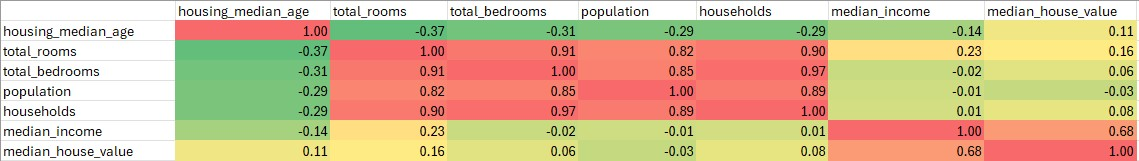

In [ ]:
from IPython.display import Image

Image('/content/4567 Final Project Correlation 2.jpg') # Replace 'housing.jpg' with the actual filename


The correlations between total_rooms, total_bedrooms, population, and households are very high. This means that they are representing the same concept. That concept is most likely population. The correlations are so high that they will likely effect our models by overrepresenting the concept of population.

In [ ]:
import pyspark.ml.feature as feat

Dummies

In [ ]:
dummies = ps.get_dummies(df_no_outliers, columns=["ocean_proximity"], drop_first=True)
dummies.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,1,0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,1,0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,1,0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,1,0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,1,0


Because we are running linear regression we need to drop the first dummy to reduce multicollinearity.

Normalization

We will not be normalizing because linear regression is not as affected by it as other models. The other models that really need it are ones that measure distance between data points.

We also want to keep the orginal scaling of the data so that the coefficients of the model are easier to interpret.

Linear Regression

In [ ]:
from pyspark.ml import Pipeline

In [ ]:
import pyspark.ml.regression as rg

#let's predict elevation (first column) using the rest of features
vectorAssembler = feat.VectorAssembler(
    inputCols=[x for x in dummies.columns if x != 'median_house_value']
       , outputCol='features',
    handleInvalid="skip")

#create a linear regression object and fit to dataset
lr_obj = rg.LinearRegression(
    labelCol='median_house_value',
    maxIter=10
    , regParam=0.01
    , elasticNetParam=1.00)
#lr_model = lr_obj.fit(dummies.to_spark())
#examine model coefficients
pip = Pipeline(stages=[vectorAssembler, lr_obj])

#run the pipeline
pModel = pip.fit(dummies.to_spark())

#get the trained model from the pipeline
lr_model = pModel.stages[-1]
#examine model coefficients
lr_model.coefficients

#print model performance metrics
summary = lr_model.summary

print(
    summary.r2
    , summary.rootMeanSquaredError
    , summary.meanAbsoluteError
)

#get predictions from the model
(
    pModel.transform(dummies.to_spark())
    .pandas_api()
    [['median_house_value', 'prediction']]
    .head(20)
)

/content/spark-3.5.5-bin-hadoop3/python/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning:

If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.



0.6351765492908972 68538.48304001741 50066.43524577184


,median_house_value,prediction
0,452600.0,424818.160666
1,358500.0,448296.517436
2,352100.0,395535.862417
3,341300.0,332817.119704
4,342200.0,264572.988680
5,269700.0,269924.541576
6,299200.0,267228.260274
7,241400.0,268091.249199
8,226700.0,203452.840542
9,261100.0,278773.530040


In [ ]:
dummies['median_house_value'].mean()


204716.31881704557

The r squared is 63.5 which means that 63.5% of the variance in the indendent variables can explain the variance in the dependent variable.

The Root Mean Squared Error is 68,538 dollars which is high, but when you consider that the average median house value is 204,716 dollars it does not seem so bad. Such a high error makes sense becasue almost 40% of the variance in the indepedent variables cannot explain the variance in house value.

Some ways we could increase the model's performance is by doing feature selection, hyperparameter tuning, and by removing columns which are highly correlated.

Coefficient Examination

In [ ]:
lr_model.coefficients

DenseVector([1370.6382, -0.9697, 82.0071, -49.6182, 79.9832, 41429.2126, -70441.1813, 1760.2948, 12589.906])

In [ ]:
dummies.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value',
       'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

For every additional year the housing median age increase the median house value goes up by 1,370.64 dollars.

For every additional room a census block group contains the median house value goes down by 0.97 dollars.

For every additional bedroom a census block group contains the median house value goes up by 82 dollars.

For every additional person a census block group's population contains the median house value goes down by 49.62 dollars.

For every additinal household a census block group contains the median house value goes up by 79.98 dollars.

For every additional dollar the median income of a census block group increases the median house value increase by 41,129.21 dollars.

The median house value decreases by 70,441.18 dollars if the census block group is located inland instead of less than an hour from the ocean.

The median house value increases by 1,760.29 dollars if the census block group is located near a bay instead of less than an hour from the ocean.

The median house value increases by 12,589.9 dollars if the census block group is located near the ocean instead of less than an hour from the ocean.

From these coefficients we can determine that ocean proximity and median income have the greatest affect on median house value in census block groups.

Gradient Boosted Trees

In [ ]:
import pyspark.ml.evaluation as ev

gbt_obj = rg.GBTRegressor(
    labelCol='median_house_value'
    , minInstancesPerNode=10
    , minInfoGain=0.1
)

pip = Pipeline(stages=[vectorAssembler, gbt_obj])

results = (
    pip
    .fit(dummies.to_spark())
    .transform(dummies.to_spark())
    .select('median_house_value', 'prediction')
)

evaluator = ev.RegressionEvaluator(labelCol='median_house_value')
evaluator.evaluate(results, {evaluator.metricName: 'r2'})

/content/spark-3.5.5-bin-hadoop3/python/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning:

If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.



0.7136047875088961

The r squared is 71.4 which means that 71.4% of the variance in the indendent variables can explain the variance in the dependent variable.